In [1]:
#Fagun Thakkar 1001868348
import pandas as pd
import copy
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns=['sepal length','sepal width','petal length','petal width','class']

In [2]:
x=data.drop(columns=['class'])
x['class']=data['class']
x['group']=0
y=data['class']

type(x)

pandas.core.frame.DataFrame

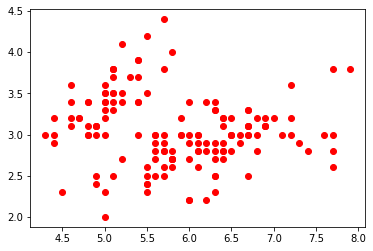

In [80]:
#sepal length division
import matplotlib.pyplot as pl
pl.scatter(x['sepal length'], x['sepal width'], color = 'red')


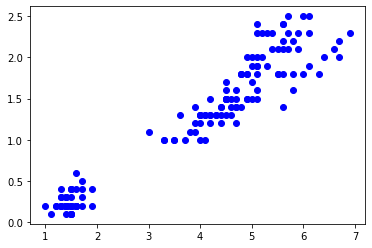

In [81]:
import matplotlib.pyplot as pl2
pl2.scatter(x['petal length'], x['petal width'], color = 'blue')

In [82]:
#k=2 with all featuers consider
centers=[x.iloc[0],x.iloc[1]]
centers

[sepal length            5.1
 sepal width             3.5
 petal length            1.4
 petal width             0.2
 class           Iris-setosa
 group                     0
 Name: 0, dtype: object,
 sepal length            4.9
 sepal width               3
 petal length            1.4
 petal width             0.2
 class           Iris-setosa
 group                     0
 Name: 1, dtype: object]

In [83]:
while(1==1):
    x['group']=0
    for index,point in x.iterrows():
        small=100#randomly 100
        i=0
        ival=0
        for c in centers:
            i=i+1
            distance=abs(c['sepal length']-point['sepal length'])+abs(c['sepal width']-point['sepal width'])+abs(c['petal length']-point['petal length'])+abs(c['petal width']-point['petal width'])
        
            if(distance<small):
                small=distance
                ival=i
        x.loc[index,'group']=ival
        
    groupby = x.groupby('group', axis=0)
    breakbool=True
    
    for index,itr in groupby.mean().iterrows():
        if(itr['sepal length']==centers[index-1]['sepal length'] and itr['sepal width']==centers[index-1]['sepal width'] and itr['petal length']==centers[index-1]['petal length'] and itr['petal width']==centers[index-1]['petal width']):
            print("same")
        else:
            centers[index-1]=itr
            breakbool=False
    if(breakbool):
        break

x

same
same


,sepal length,sepal width,petal length,petal width,class,group
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [84]:
listSet=[]
listVir=[]
listVer=[]
listcls1=[]
listcls2=[]

#for grouping into class 1 2 and 3 , for grouping for  class setosa virginica and versicolor
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        listSet.append(data)
    elif(data['class']=='Iris-virginica'):
        listVir.append(data)
    elif(data['class']=='Iris-versicolor'):
        listVer.append(data)
    if(data['group']==1):
        listcls1.append(data)
    elif(data['group']==2):
        listcls2.append(data)

#to check which class (1,2,3) is majority for setosa
setosaclass=0
virgclass=0
versiclass=0
countcl1=0
countcl2=0
for se in listSet: 
    for cl1 in listcls1:
        if(cl1['sepal length']==se['sepal length'] and cl1['sepal width']==se['sepal width'] and cl1['petal length']==se['petal length'] and cl1['petal width']==se['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==se['sepal length'] and cl2['sepal width']==se['sepal width'] and cl2['petal length']==se['petal length'] and cl2['petal width']==se['petal width']):
            countcl2+=1

if(countcl1>countcl2):
    setosaclass=1
elif(countcl2>countcl1):
    setosaclass=2

countcl1=0
countcl2=0

for vir in listVir: 
    for cl1 in listcls1:
        if(cl1['sepal length']==vir['sepal length'] and cl1['sepal width']==vir['sepal width'] and cl1['petal length']==vir['petal length'] and cl1['petal width']==vir['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==vir['sepal length'] and cl2['sepal width']==vir['sepal width'] and cl2['petal length']==vir['petal length'] and cl2['petal width']==vir['petal width']):
            countcl2+=1

if(countcl1>countcl2):
    virgclass=1
elif(countcl2>countcl1):
    virgclass=2

countcl1=0
countcl2=0

for ver in listVer: 
    for cl1 in listcls1:
        if(cl1['sepal length']==ver['sepal length'] and cl1['sepal width']==ver['sepal width'] and cl1['petal length']==ver['petal length'] and cl1['petal width']==ver['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==ver['sepal length'] and cl2['sepal width']==ver['sepal width'] and cl2['petal length']==ver['petal length'] and cl2['petal width']==ver['petal width']):
            countcl2+=1

if(countcl1>countcl2):
    versiclass=1
elif(countcl2>countcl1):
    versiclass=2

    
print(versiclass)

2


In [85]:
#for assigning class to dataset x into column group1
x['group1']=0
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        x.loc[index,'group1']=setosaclass
    elif(data['class']=='Iris-virginica'):
        x.loc[index,'group1']=virgclass
    else:
        x.loc[index,'group1']=versiclass      
count=0  
#this group 1 column will be used to check assigned labels with group column
#Column group was filed during 2- means process
#finally calculating accuracy
for index,data in x.iterrows():
    if(data['group']==data['group1']):
        count+=1
        
accuracy=(count/len(x))*100
print(accuracy)

97.33333333333334


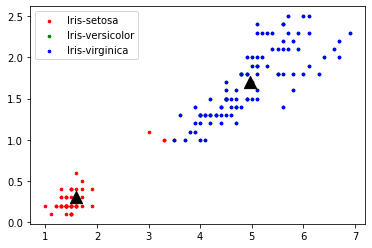

In [86]:
#https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/
for i,data in x.iterrows():
    if(data['group']==1):
        l1 = pl.scatter(data['petal length'], data['petal width'], s=7, color = 'red', label = 'Iris-setosa')
    if(data['group']==2):
        l2 = pl.scatter(data['petal length'], data['petal width'], s=7, color = 'green', label = 'Iris-versicolor')
    if(data['group']==2):
        l3 = pl.scatter(data['petal length'], data['petal width'], s=7, color = 'blue', label = 'Iris-virginica')
        
handles, labels = pl.gca().get_legend_handles_labels()
handle_list, label_list = [], []

for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

pl.legend(handle_list, label_list)
pl.scatter(centers[0]['petal length'], centers[0]['petal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[1]['petal length'], centers[1]['petal width'], marker='^', c='black', s=150, label = 'Centroids')

pl.show()

In [87]:
#k=3 with all featuers consider
centers=[x.iloc[0],x.iloc[1],x.iloc[2]]
centers

[sepal length            5.1
 sepal width             3.5
 petal length            1.4
 petal width             0.2
 class           Iris-setosa
 group                     1
 group1                    1
 Name: 0, dtype: object,
 sepal length            4.9
 sepal width               3
 petal length            1.4
 petal width             0.2
 class           Iris-setosa
 group                     1
 group1                    1
 Name: 1, dtype: object,
 sepal length            4.7
 sepal width             3.2
 petal length            1.3
 petal width             0.2
 class           Iris-setosa
 group                     1
 group1                    1
 Name: 2, dtype: object]

In [88]:
#using manhattan distance
while(1==1):
    x['group']=0
    for index,point in x.iterrows():
        small=100#randomly 100
        i=0
        ival=0
        for c in centers:
            i=i+1
            distance=abs(c['sepal length']-point['sepal length'])+abs(c['sepal width']-point['sepal width'])+abs(c['petal length']-point['petal length'])+abs(c['petal width']-point['petal width'])
        
            if(distance<small):
                #print(distance)
                small=distance
                ival=i
        x.loc[index,'group']=ival
        
    groupby = x.groupby('group', axis=0)
    breakbool=True
    for index,itr in groupby.mean().iterrows():
        if(itr['sepal length']==centers[index-1]['sepal length'] and itr['sepal width']==centers[index-1]['sepal width'] and itr['petal length']==centers[index-1]['petal length'] and itr['petal width']==centers[index-1]['petal width']):
            print("same")
        else:
            centers[index-1]=itr
            breakbool=False
    if(breakbool):
        break
        

same
same
same
same
same
same
same
same
same
same
same
same
same
same


In [89]:
listSet=[]
listVir=[]
listVer=[]
listcls1=[]
listcls2=[]
listcls3=[]
#for grouping into class 1 2 and 3 , for grouping fo setosa virginica and versicolor
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        listSet.append(data)
    elif(data['class']=='Iris-virginica'):
        listVir.append(data)
    elif(data['class']=='Iris-versicolor'):
        listVer.append(data)
    if(data['group']==1):
        listcls1.append(data)
    elif(data['group']==2):
        listcls2.append(data)
    elif(data['group']==3):
        listcls3.append(data)


setosaclass=0
virgclass=0
versiclass=0
countcl1=0
countcl2=0
countcl3=0
for se in listSet: 
    for cl1 in listcls1:
        if(cl1['sepal length']==se['sepal length'] and cl1['sepal width']==se['sepal width'] and cl1['petal length']==se['petal length'] and cl1['petal width']==se['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==se['sepal length'] and cl2['sepal width']==se['sepal width'] and cl2['petal length']==se['petal length'] and cl2['petal width']==se['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==se['sepal length'] and cl3['sepal width']==se['sepal width'] and cl3['petal length']==se['petal length'] and cl3['petal width']==se['petal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    setosaclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    setosaclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    setosaclass=3

countcl1=0
countcl2=0
countcl3=0

for vir in listVir: 
    for cl1 in listcls1:
        if(cl1['sepal length']==vir['sepal length'] and cl1['sepal width']==vir['sepal width'] and cl1['petal length']==vir['petal length'] and cl1['petal width']==vir['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==vir['sepal length'] and cl2['sepal width']==vir['sepal width'] and cl2['petal length']==vir['petal length'] and cl2['petal width']==vir['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==vir['sepal length'] and cl3['sepal width']==vir['sepal width'] and cl3['petal length']==vir['petal length'] and cl3['petal width']==vir['petal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    virgclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    virgclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    virgclass=3

countcl1=0
countcl2=0
countcl3=0

for ver in listVer: 
    for cl1 in listcls1:
        if(cl1['sepal length']==ver['sepal length'] and cl1['sepal width']==ver['sepal width'] and cl1['petal length']==ver['petal length'] and cl1['petal width']==ver['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==ver['sepal length'] and cl2['sepal width']==ver['sepal width'] and cl2['petal length']==ver['petal length'] and cl2['petal width']==ver['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==ver['sepal length'] and cl3['sepal width']==ver['sepal width'] and cl3['petal length']==ver['petal length'] and cl3['petal width']==ver['petal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    versiclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    versiclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    versiclass=3
    

In [90]:
x['group1']=0
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        x.loc[index,'group1']=setosaclass
    elif(data['class']=='Iris-virginica'):
        x.loc[index,'group1']=virgclass
    else:
        x.loc[index,'group1']=versiclass      
count=0    
for index,data in x.iterrows():
    if(data['group']==data['group1']):
        count+=1
        
accuracy=(count/len(x))*100
print(accuracy)

88.66666666666667


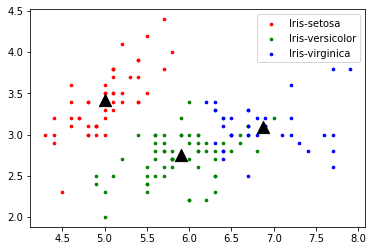

In [91]:
#https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/
for i,data in x.iterrows():
    if(data['group']==3):
        l1 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'red', label = 'Iris-setosa')
    if(data['group']==1):
        l2 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'green', label = 'Iris-versicolor')
    if(data['group']==2):
        l3 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'blue', label = 'Iris-virginica')
        
handles, labels = pl.gca().get_legend_handles_labels()
handle_list, label_list = [], []

for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

pl.legend(handle_list, label_list)
pl.scatter(centers[0]['sepal length'], centers[0]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[1]['sepal length'], centers[1]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[2]['sepal length'], centers[2]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.show()

In [92]:
#k=3 with petal length and width as featuers 
#using centroid from previous method (k=3 with all featuers)
#using manhattan distance
while(1==1):
    x['group']=0
    for index,point in x.iterrows():
        small=100#randomly 100
        i=0
        ival=0
        for c in centers:
            i=i+1
            distance=abs(c['petal length']-point['petal length'])+abs(c['petal width']-point['petal width'])
        
            if(distance<small):
                small=distance
                ival=i
        x.loc[index,'group']=ival
        
    groupby = x.groupby('group', axis=0)
    breakbool=True
    for index,itr in groupby.mean().iterrows():
        if(itr['petal length']==centers[index-1]['petal length'] and itr['petal width']==centers[index-1]['petal width']):
            print("same")
        else:
            centers[index-1]=itr
            breakbool=False
    if(breakbool):
        break
        

same
same
same
same


In [93]:
listSet=[]
listVir=[]
listVer=[]
listcls1=[]
listcls2=[]
listcls3=[]
#for grouping into class 1 2 and 3 , for grouping fo setosa virginica and versicolor
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        listSet.append(data)
    elif(data['class']=='Iris-virginica'):
        listVir.append(data)
    elif(data['class']=='Iris-versicolor'):
        listVer.append(data)
    if(data['group']==1):
        listcls1.append(data)
    elif(data['group']==2):
        listcls2.append(data)
    elif(data['group']==3):
        listcls3.append(data)


setosaclass=0
virgclass=0
versiclass=0
countcl1=0
countcl2=0
countcl3=0
for se in listSet: 
    for cl1 in listcls1:
        if(cl1['petal length']==se['petal length'] and cl1['petal width']==se['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['petal length']==se['petal length'] and cl2['petal width']==se['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['petal length']==se['petal length'] and cl3['petal width']==se['petal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    setosaclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    setosaclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    setosaclass=3

countcl1=0
countcl2=0
countcl3=0

for vir in listVir: 
    for cl1 in listcls1:
        if(cl1['petal length']==vir['petal length'] and cl1['petal width']==vir['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['petal length']==vir['petal length'] and cl2['petal width']==vir['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['petal length']==vir['petal length'] and cl3['petal width']==vir['petal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    virgclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    virgclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    virgclass=3

countcl1=0
countcl2=0
countcl3=0

for ver in listVer: 
    for cl1 in listcls1:
        if(cl1['petal length']==ver['petal length'] and cl1['petal width']==ver['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['petal length']==ver['petal length'] and cl2['petal width']==ver['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['petal length']==ver['petal length'] and cl3['petal width']==ver['petal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    versiclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    versiclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    versiclass=3
    

In [94]:
x['group1']=0
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        x.loc[index,'group1']=setosaclass
    elif(data['class']=='Iris-virginica'):
        x.loc[index,'group1']=virgclass
    else:
        x.loc[index,'group1']=versiclass      
count=0    
for index,data in x.iterrows():
    if(data['group']==data['group1']):
        count+=1
        
accuracy=(count/len(x))*100
print(accuracy)

95.33333333333334


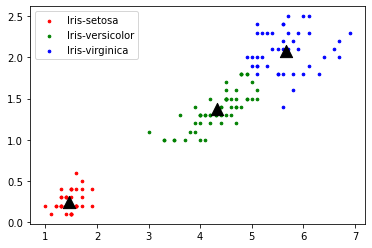

In [95]:
#https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/
for i,data in x.iterrows():
    if(data['group']==3):
        l1 = pl.scatter(data['petal length'], data['petal width'], s=7, color = 'red', label = 'Iris-setosa')
    if(data['group']==1):
        l2 = pl.scatter(data['petal length'], data['petal width'], s=7, color = 'green', label = 'Iris-versicolor')
    if(data['group']==2):
        l3 = pl.scatter(data['petal length'], data['petal width'], s=7, color = 'blue', label = 'Iris-virginica')
        
handles, labels = pl.gca().get_legend_handles_labels()
handle_list, label_list = [], []

for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

pl.legend(handle_list, label_list)
pl.scatter(centers[0]['petal length'], centers[0]['petal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[1]['petal length'], centers[1]['petal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[2]['petal length'], centers[2]['petal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.show()

In [96]:
#k=3 with petal length and width as featuers 
#using centeroid from above method (k=3 with petal length and width)
#using manhattan distance
while(1==1):
    x['group']=0
    for index,point in x.iterrows():
        small=100#randomly 100
        i=0
        ival=0
        for c in centers:
            i=i+1
            distance=abs(c['sepal length']-point['sepal length'])+abs(c['sepal width']-point['sepal width'])
        
            if(distance<small):
                small=distance
                ival=i
        x.loc[index,'group']=ival
        
    groupby = x.groupby('group', axis=0)
    breakbool=True
    for index,itr in groupby.mean().iterrows():
        if(itr['sepal length']==centers[index-1]['sepal length'] and itr['sepal width']==centers[index-1]['sepal width']):
            print("same")
        else:
            centers[index-1]=itr
            breakbool=False
    if(breakbool):
        break
        

same
same
same
same
same


In [97]:
listSet=[]
listVir=[]
listVer=[]
listcls1=[]
listcls2=[]
listcls3=[]
#for grouping into class 1 2 and 3 , for grouping fo setosa virginica and versicolor
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        listSet.append(data)
    elif(data['class']=='Iris-virginica'):
        listVir.append(data)
    elif(data['class']=='Iris-versicolor'):
        listVer.append(data)
    if(data['group']==1):
        listcls1.append(data)
    elif(data['group']==2):
        listcls2.append(data)
    elif(data['group']==3):
        listcls3.append(data)


setosaclass=0
virgclass=0
versiclass=0
countcl1=0
countcl2=0
countcl3=0
for se in listSet: 
    for cl1 in listcls1:
        if(cl1['sepal length']==se['sepal length'] and cl1['sepal width']==se['sepal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==se['sepal length'] and cl2['sepal width']==se['sepal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==se['sepal length'] and cl3['sepal width']==se['sepal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    setosaclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    setosaclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    setosaclass=3

countcl1=0
countcl2=0
countcl3=0

for vir in listVir: 
    for cl1 in listcls1:
        if(cl1['sepal length']==vir['sepal length'] and cl1['sepal width']==vir['sepal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==vir['sepal length'] and cl2['sepal width']==vir['sepal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==vir['sepal length'] and cl3['sepal width']==vir['sepal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    virgclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    virgclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    virgclass=3

countcl1=0
countcl2=0
countcl3=0

for ver in listVer: 
    for cl1 in listcls1:
        if(cl1['sepal length']==ver['sepal length'] and cl1['sepal width']==ver['sepal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==ver['sepal length'] and cl2['sepal width']==ver['sepal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==ver['sepal length'] and cl3['sepal width']==ver['sepal width']):
            countcl3+=1

if(countcl1>countcl2 and countcl1>countcl3):
    versiclass=1
elif(countcl2>countcl1 and countcl2>countcl3):
    versiclass=2
elif(countcl3>countcl1 and countcl3>countcl2):
    versiclass=3
    

In [100]:
x['group1']=0
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        x.loc[index,'group1']=setosaclass
    elif(data['class']=='Iris-virginica'):
        x.loc[index,'group1']=virgclass
    else:
        x.loc[index,'group1']=versiclass      
count=0    
for index,data in x.iterrows():
    if(data['group']==data['group1']):
        count+=1
        
accuracy=(count/len(x))*100
print(accuracy)

76.0


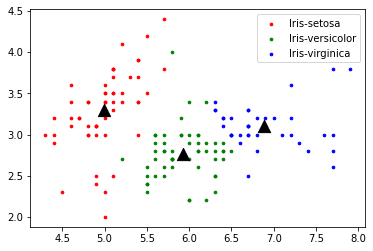

In [101]:
#https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/
for i,data in x.iterrows():
    if(data['group']==3):
        l1 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'red', label = 'Iris-setosa')
    if(data['group']==1):
        l2 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'green', label = 'Iris-versicolor')
    if(data['group']==2):
        l3 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'blue', label = 'Iris-virginica')
        
handles, labels = pl.gca().get_legend_handles_labels()
handle_list, label_list = [], []

for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

pl.legend(handle_list, label_list)
pl.scatter(centers[0]['sepal length'], centers[0]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[1]['sepal length'], centers[1]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[2]['sepal length'], centers[2]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.show()

In [105]:
#k=4 with all featuers consider for distance
centers=[x.iloc[0],x.iloc[1],x.iloc[2],x.iloc[3]]

In [106]:
#using manhattan distance
while(1==1):
    x['group']=0
    for index,point in x.iterrows():
        small=100#randomly 100
        i=0
        ival=0
        for c in centers:
            i=i+1
            distance=abs(c['sepal length']-point['sepal length'])+abs(c['sepal width']-point['sepal width'])+abs(c['petal length']-point['petal length'])+abs(c['petal width']-point['petal width'])
        
            if(distance<small):
                #print(distance)
                small=distance
                ival=i
        x.loc[index,'group']=ival
        
    groupby = x.groupby('group', axis=0)
    breakbool=True
    for index,itr in groupby.mean().iterrows():
        if(itr['sepal length']==centers[index-1]['sepal length'] and itr['sepal width']==centers[index-1]['sepal width'] and itr['petal length']==centers[index-1]['petal length'] and itr['petal width']==centers[index-1]['petal width']):
            print("same")
        else:
            centers[index-1]=itr
            breakbool=False
    if(breakbool):
        break
x

same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same
same


,sepal length,sepal width,petal length,petal width,class,group,group1
0,5.1,3.5,1.4,0.2,Iris-setosa,3,3
1,4.9,3.0,1.4,0.2,Iris-setosa,4,3
2,4.7,3.2,1.3,0.2,Iris-setosa,4,3
3,4.6,3.1,1.5,0.2,Iris-setosa,4,3
4,5.0,3.6,1.4,0.2,Iris-setosa,3,3
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [107]:
for index,d in x.iterrows():
    print(d['class']," ",d['group'])

Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   3
Iris-setosa   4
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   4
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   3
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   3
Iris-setosa   4
Iris-setosa   4
Iris-setosa   3
Iris-setosa   3
Iris-setosa   4
Iris-setosa   3
Iris-setosa   4
Iris-setosa   3
Iris-setosa   4
Iris-versicolor   1
Iris-versicolor   1
Iris-versicolor   2
Iris-versicolor   1
Iris-versicolor   1
Iris-versicolor   1
Iris-versicolor   1
Iris-versicolor   1
Iris-versicolor   1
Iris-versicolor   1


In [109]:
listSet=[]
listVir=[]
listVer=[]
listcls1=[]
listcls2=[]
listcls3=[]
listcls4=[]
#for grouping into class 1 2 and 3 , for grouping fo setosa virginica and versicolor
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        listSet.append(data)
    elif(data['class']=='Iris-virginica'):
        listVir.append(data)
    elif(data['class']=='Iris-versicolor'):
        listVer.append(data)
    if(data['group']==1):
        listcls1.append(data)
    elif(data['group']==2):
        listcls2.append(data)
    elif(data['group']==3):
        listcls3.append(data)
    elif(data['group']==4):
        listcls4.append(data)        


setosaclass=0
virgclass=0
versiclass=0
countcl1=0
countcl2=0
countcl3=0
countcl4=0
arr=[]
for se in listSet: 
    for cl1 in listcls1:
        if(cl1['sepal length']==se['sepal length'] and cl1['sepal width']==se['sepal width'] and cl1['petal length']==se['petal length'] and cl1['petal width']==se['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==se['sepal length'] and cl2['sepal width']==se['sepal width'] and cl2['petal length']==se['petal length'] and cl2['petal width']==se['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==se['sepal length'] and cl3['sepal width']==se['sepal width'] and cl3['petal length']==se['petal length'] and cl3['petal width']==se['petal width']):
            countcl3+=1
    for cl4 in listcls4:
        if(cl4['sepal length']==se['sepal length'] and cl4['sepal width']==se['sepal width'] and cl4['petal length']==se['petal length'] and cl4['petal width']==se['petal width']):
            countcl4+=1

arr.append(countcl1)
arr.append(countcl2)
arr.append(countcl3)
arr.append(countcl4)

for i in range(4):
    if(setosaclass<arr[i]):
        setosaclass=i
countcl1=0
countcl2=0
countcl3=0
countcl4=0

for vir in listVir: 
    for cl1 in listcls1:
        if(cl1['sepal length']==vir['sepal length'] and cl1['sepal width']==vir['sepal width'] and cl1['petal length']==vir['petal length'] and cl1['petal width']==vir['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==vir['sepal length'] and cl2['sepal width']==vir['sepal width'] and cl2['petal length']==vir['petal length'] and cl2['petal width']==vir['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==vir['sepal length'] and cl3['sepal width']==vir['sepal width'] and cl3['petal length']==vir['petal length'] and cl3['petal width']==vir['petal width']):
            countcl3+=1
    for cl4 in listcls4:
        if(cl4['sepal length']==vir['sepal length'] and cl4['sepal width']==vir['sepal width'] and cl4['petal length']==vir['petal length'] and cl4['petal width']==vir['petal width']):
            countcl4+=1
arr=[]

arr.append(countcl1)
arr.append(countcl2)
arr.append(countcl3)
arr.append(countcl4)

for i in range(4):
    if(virgclass<arr[i]):
        virgclass=i
countcl1=0
countcl2=0
countcl3=0
countcl4=0

for ver in listVer: 
    for cl1 in listcls1:
        if(cl1['sepal length']==ver['sepal length'] and cl1['sepal width']==ver['sepal width'] and cl1['petal length']==ver['petal length'] and cl1['petal width']==ver['petal width']):
            countcl1+=1
    for cl2 in listcls2:
        if(cl2['sepal length']==ver['sepal length'] and cl2['sepal width']==ver['sepal width'] and cl2['petal length']==ver['petal length'] and cl2['petal width']==ver['petal width']):
            countcl2+=1
    for cl3 in listcls3:
        if(cl3['sepal length']==ver['sepal length'] and cl3['sepal width']==ver['sepal width'] and cl3['petal length']==ver['petal length'] and cl3['petal width']==ver['petal width']):
            countcl3+=1
    for cl4 in listcls4:
        if(cl4['sepal length']==ver['sepal length'] and cl4['sepal width']==ver['sepal width'] and cl4['petal length']==ver['petal length'] and cl4['petal width']==ver['petal width']):
            countcl4+=1

arr=[]

arr.append(countcl1)
arr.append(countcl2)
arr.append(countcl3)
arr.append(countcl4)

for i in range(4):
    if(virgclass<arr[i]):
        versiclass=i
    

In [110]:
x['group1']=0
for index,data in x.iterrows():
    if(data['class']=='Iris-setosa'):
        x.loc[index,'group1']=setosaclass
    elif(data['class']=='Iris-virginica'):
        x.loc[index,'group1']=virgclass
    else:
        x.loc[index,'group1']=versiclass      
count=0    
for index,data in x.iterrows():
    if(data['group']==data['group1']):
        count+=1
        
accuracy=(count/len(x))*100
print(accuracy)

60.0


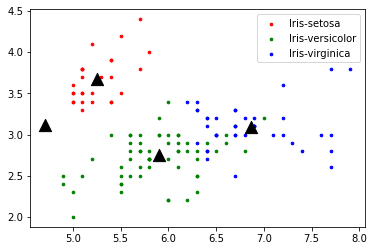

In [112]:
#https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/
for i,data in x.iterrows():
    if(data['group']==3):
        l1 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'red', label = 'Iris-setosa')
    if(data['group']==1):
        l2 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'green', label = 'Iris-versicolor')
    if(data['group']==2):
        l3 = pl.scatter(data['sepal length'], data['sepal width'], s=7, color = 'blue', label = 'Iris-virginica')
        
handles, labels = pl.gca().get_legend_handles_labels()
handle_list, label_list = [], []

for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

pl.legend(handle_list, label_list)
pl.scatter(centers[0]['sepal length'], centers[0]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[1]['sepal length'], centers[1]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[2]['sepal length'], centers[2]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.scatter(centers[3]['sepal length'], centers[3]['sepal width'], marker='^', c='black', s=150, label = 'Centroids')
pl.show()